In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#attributes don't use () only methods
df = pd.read_csv("Contact Information (Responses) - Form Responses 1.csv")
df.head()
df.shape

(23, 19)

In [3]:
#used to set display attributes of data frame
pd.set_option('display.max_columns',18)



In [12]:
#head or tail to view rows and can input integer in parenthesis
df


,Timestamp,Sleep,Wake,Sleep Quality,Waking Energy,Work,Focused Learning,Skill practicing,Physical Endeavors,Scrolling,jorking,Passive media,Active Media,Dominant Emotion (Less to more pleasurable),Dominant Emotion with intensity (1-10),Enhancers,how much?,MISC,System Architecture
0,6/30/2025,2:00:00 AM,11:00:00 AM,6,9,5,120,60,0,33,1,60,180,0,6,NIC,1 pouch,"Pain in left knee from run on sunday biggest ""...",20
1,7/1/2025,12:00:00 AM,6:00:00 AM,4,10,5,0,10,90,30,2,53,15,4,8,CAF,100 g,Work up goal oriented when I got sleepy took s...,40
2,7/2/2025,12:00:00 AM,6:00:00 AM,6,8,5,0,0,100,40,2,90,75,2,8,WE,100 g,Had a slight discussion with superviser but i ...,30
3,7/3/2025,5:00:00 AM,7:45:00 AM,2,4,0,60,0,0,0,2,90,180,0,10,NaN,0,Had to catch a flight lost track of time reaso...,10
4,7/4/2025,3:00:00 AM,11:30:00 AM,3,4,0,30,0,30,30,1,40,260,2,8,NaN,0,Had a headache,20
5,7/5/2025,3:00:00 AM,11:30:00 AM,2,3,0,180,0,120,40,3,120,90,3,4,"NIC, CAF",2 puches 100 grams,Helped dad implement app idea and got guitar,40
6,7/6/2025,3:00:00 AM,10:30:00 AM,3,7,0,120,50,90,30,1,5,360,3,4,NIC,1 pouch,Went to church,10
7,7/7/2025,3:00:00 AM,12:00:00 AM,3,3,0,0,10,0,60,1,60,60,3,6,NaN,0,asked for extension vacation,0
8,7/8/2025,2:00:00 AM,11:00:00 AM,3,2,0,0,20,30,60,2,120,120,3,8,NaN,0,Went to the beach,0
9,7/9/2025,6:00:00 AM,1:30:00 PM,2,2,0,40,30,0,30,5,240,45,-4,8,"ALC, NIC","two pouches, vape , 6+ drinks","""Gooned for 3 hours, man pulled up, ran home.""",20


In [6]:
energy = df['Waking Energy']
type(energy)
df.columns
# a dataframe is a container for a group of series which are just arrays

Index(['Timestamp', 'Sleep', 'Wake', 'Sleep Quality', 'Waking Energy', 'Work',
       'Focused Learning', 'Skill practicing', 'Physical Endeavors',
       'Scrolling', 'jorking', 'Passive media ', 'Active Media',
       'Dominant Emotion  (Less to more pleasurable)',
       'Dominant Emotion with intensity (1-10)', 'Enhancers', 'how much?',
       'MISC', 'System Architecture'],
      dtype='object')

In [10]:
#iloc integer location 
df.iloc[0]
#loc index location
df.loc[2]


Timestamp                                                                                7/2/2025
Sleep                                                                                 12:00:00 AM
Wake                                                                                   6:00:00 AM
Sleep Quality                                                                                   6
Waking Energy                                                                                   8
Work                                                                  8 hours pulling rose bushes
Focused Learning                                                                                0
Skill practicing                                                                                0
Physical Endeavors                                                                            100
Scrolling                                                                                      40
jorking             

In [9]:
df["jorking"].value_counts()
df.loc[2:8,'jorking']


2    2
3    2
4    1
5    3
6    1
7    1
8    2
Name: jorking, dtype: object

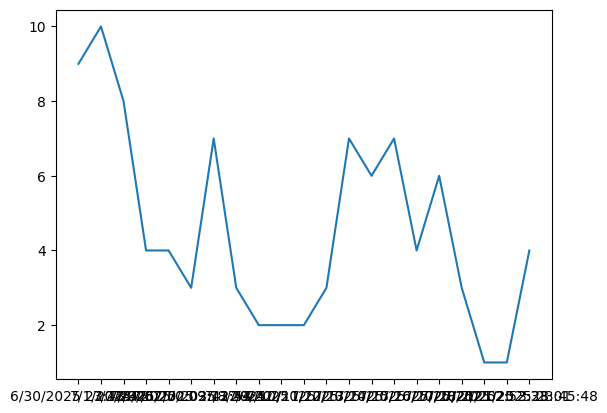

In [5]:
x = df.Timestamp
y = df['Waking Energy']
z = df['Wake']
plt.plot(x,y)

In [ ]:
# explicitly define the format that the data is in to properly turn into date time object


df = pd.read_csv("Contact Information (Responses) - Form Responses 1.csv")


# define our time stamp column considered a string as date object via to_datetime as a new column Date
df["Date"] = pd.to_datetime(df["Timestamp"],format='%m/%d/%Y')
wake_time = pd.to_datetime(df["Wake"],format='%I:%M:%S %p')
sleep_time = pd.to_datetime(df["Sleep"],format='%I:%M:%S %p')



# use mod to deal with over mid night differences so that it wraps around and gives us the actual differnce
df["hours_slept"] = ((wake_time - sleep_time).dt.seconds / 3600) % 24

# .dt to select date time object .hour for 0-23 .seconds for 0-59 etc
df["bedtime_hour"] = sleep_time.dt.hour 
df["wake_hour"] = wake_time.dt.hour



In [41]:
# First, make sure you have a 'Date' column that is a datetime object
# If your date column is a string, convert it:
# df['Date'] = pd.to_datetime(df['Date_Column_Name'])



# Then sort the entire DataFrame by that date which allows drops originaly indexes
df = df.sort_values(by='Date').reset_index(drop=True)
# Calculate the 4-day moving average of bedtime_hour, rolling is the arg for selecting the window .mean() the operation also use .var() for variance
#df['average_bedtime'] = df['bedtime_hour'].rolling(window=4).mean()
# same
df['Waking_Energy_Yesterday'] = df['Waking Energy'].shift(1)

cutoff_hour = 12 

# Create a new column 'bedtime_hour_linear'.
# If bedtime_hour < 12, add 24 to it. Otherwise, keep the original hour.
df['bedtime_hour_linear'] = df['bedtime_hour'].apply(lambda hour: hour + 24 if hour < cutoff_hour else hour)
df['bedtime_std_4_days'] = df['bedtime_hour_linear'].rolling(window=4).std()

# Create a boolean Series (True for weekends, False for weekdays)
# and convert it to integers (True=1, False=0).
df['Weekend_Flag'] = (df['Date'].dt.dayofweek >= 5).astype(int)

In [44]:
df

,Timestamp,Sleep,Wake,Sleep Quality,Waking Energy,Work,Focused Learning,Skill practicing,Physical Endeavors,Scrolling,...,MISC,System Architecture,Date,hours_slept,bedtime_hour,wake_hour,bedtime_std_4_days,bedtime_hour_linear,Waking_Energy_Yesterday,Weekend_Flag
0,6/30/2025,2:00:00 AM,11:00:00 AM,6,9,5,120,60,0,33,...,"Pain in left knee from run on sunday biggest ""...",20,2025-06-30,9.000000,2,11,NaN,26,NaN,0
1,7/1/2025,12:00:00 AM,6:00:00 AM,4,10,5,0,10,90,30,...,Work up goal oriented when I got sleepy took s...,40,2025-07-01,6.000000,0,6,NaN,24,9.0,0
2,7/2/2025,12:00:00 AM,6:00:00 AM,6,8,5,0,0,100,40,...,Had a slight discussion with superviser but i ...,30,2025-07-02,6.000000,0,6,NaN,24,10.0,0
3,7/3/2025,5:00:00 AM,7:45:00 AM,2,4,0,60,0,0,0,...,Had to catch a flight lost track of time reaso...,10,2025-07-03,2.750000,5,7,2.362908,29,8.0,0
4,7/4/2025,3:00:00 AM,11:30:00 AM,3,4,0,30,0,30,30,...,Had a headache,20,2025-07-04,8.500000,3,11,2.449490,27,4.0,0
5,7/5/2025,3:00:00 AM,11:30:00 AM,2,3,0,180,0,120,40,...,Helped dad implement app idea and got guitar,40,2025-07-05,8.500000,3,11,2.061553,27,4.0,1
6,7/6/2025,3:00:00 AM,10:30:00 AM,3,7,0,120,50,90,30,...,Went to church,10,2025-07-06,7.500000,3,10,1.000000,27,3.0,1
7,7/7/2025,3:00:00 AM,12:00:00 AM,3,3,0,0,10,0,60,...,asked for extension vacation,0,2025-07-07,21.000000,3,0,0.000000,27,7.0,0
8,7/8/2025,2:00:00 AM,11:00:00 AM,3,2,0,0,20,30,60,...,Went to the beach,0,2025-07-08,9.000000,2,11,0.500000,26,3.0,0
9,7/9/2025,6:00:00 AM,1:30:00 PM,2,2,0,40,30,0,30,...,"""Gooned for 3 hours, man pulled up, ran home.""",20,2025-07-09,7.500000,6,13,1.732051,30,2.0,0


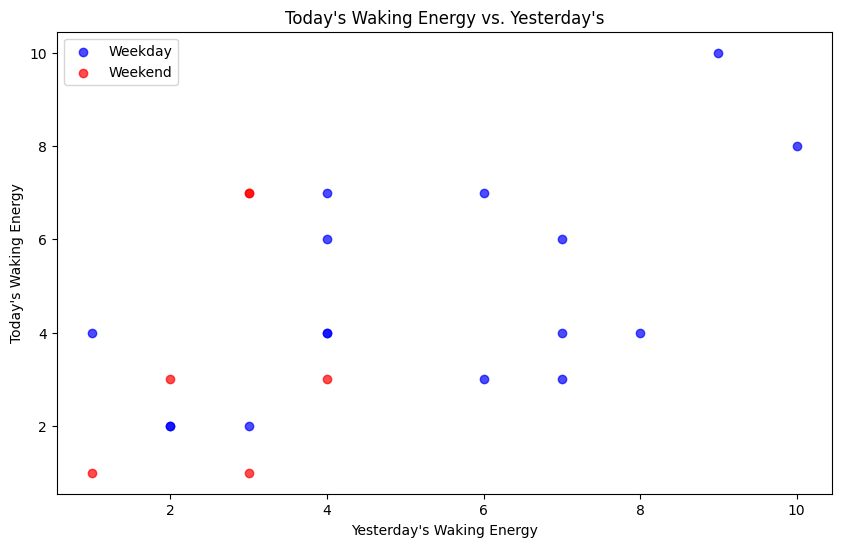

In [49]:


# --- Recommended Method: Plotting Categories Separately ---

# 1. Define your data
x = df['Waking_Energy_Yesterday']
y = df['Waking Energy']

# 2. Create filters for weekdays and weekends
is_weekend = df['Weekend_Flag'] == 1
is_weekday = df['Weekend_Flag'] == 0

# 3. Create the plot object
plt.figure(figsize=(10, 6))

# 4. Plot the two groups separately on the same axes
#    The 'label' argument is the key for the legend.
plt.scatter(x[is_weekday], y[is_weekday], color='blue', alpha=0.7, label='Weekday')
plt.scatter(x[is_weekend], y[is_weekend], color='red', alpha=0.7, label='Weekend')

# 5. Add labels and a title for clarity
plt.title("Today's Waking Energy vs. Yesterday's")
plt.xlabel("Yesterday's Waking Energy")
plt.ylabel("Today's Waking Energy")

# 6. Call plt.legend() to display the legend automatically
plt.legend()

# 7. Show the plot
plt.show()

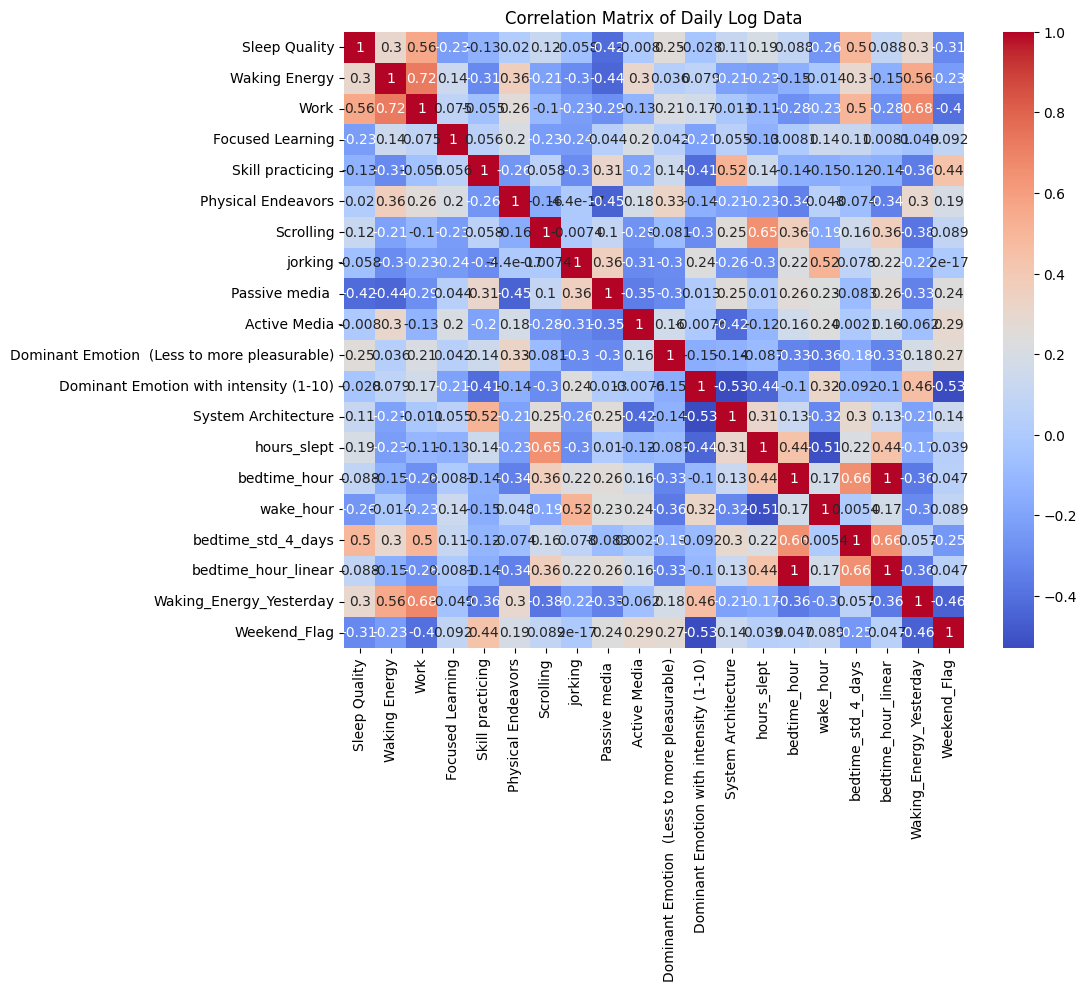

In [43]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) # Make the plot bigger
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Log Data')
plt.show()